In [1]:
from fastai import *
from fastbook import *
from fastai.vision.all import *

In [2]:
#getting dutch shepperd files
"""
key = os.environ.get('AZURE_SEARCH_KEY', 'XXX') #replace with a working azure api bing search key

path = "/home/lucien/Desktop/Repos/pet_breeds"
names = ["Long Haired Dutch Shepherd"]

for name in names: 
    subpath = path
    if not os.path.exists(subpath):
        os.makedirs(subpath)
    results = search_images_bing(key, name)
    urls = results.attrgot('contentUrl')
    download_images(subpath, urls=urls)
"""


'\nkey = os.environ.get(\'AZURE_SEARCH_KEY\', \'XXX\') #replace with a working azure api bing search key\n\npath = "/home/lucien/Desktop/Repos/pet_breeds"\nnames = ["Long Haired Dutch Shepherd"]\n\nfor name in names: \n    subpath = path\n    if not os.path.exists(subpath):\n        os.makedirs(subpath)\n    results = search_images_bing(key, name)\n    urls = results.attrgot(\'contentUrl\')\n    download_images(subpath, urls=urls)\n'

In [3]:
#renaming
"""
import os 
os.chdir(path)
print(os.getcwd())
counter = 1
"""

'\nimport os \nos.chdir(path)\nprint(os.getcwd())\ncounter = 1\n'

In [4]:
"""
def increment():
    global counter
    counter = counter + 1
    
for f in os.listdir():
    f_name, f_ext = os.path.splitext(f)
    f_name = "dutch_long_" + str(counter) + ".jpg"
    increment()
    
    new_name = '{}'.format(f_name )
    os.rename(f, new_name)
"""
    
#now manually taking them into the dataset 

'\ndef increment():\n    global counter\n    counter = counter + 1\n    \nfor f in os.listdir():\n    f_name, f_ext = os.path.splitext(f)\n    f_name = "dutch_long_" + str(counter) + ".jpg"\n    increment()\n    \n    new_name = \'{}\'.format(f_name )\n    os.rename(f, new_name)\n'

In [5]:
path = untar_data(URLs.PETS, dest = "/home/lucien/Desktop/Repos/pet_breeds_addition")
(path/'images').ls()

(#7453) [Path('/home/lucien/Desktop/Repos/pet_breeds_addition/oxford-iiit-pet/images/Russian_Blue_30.jpg'),Path('/home/lucien/Desktop/Repos/pet_breeds_addition/oxford-iiit-pet/images/american_bulldog_115.jpg'),Path('/home/lucien/Desktop/Repos/pet_breeds_addition/oxford-iiit-pet/images/British_Shorthair_213.jpg'),Path('/home/lucien/Desktop/Repos/pet_breeds_addition/oxford-iiit-pet/images/Abyssinian_207.jpg'),Path('/home/lucien/Desktop/Repos/pet_breeds_addition/oxford-iiit-pet/images/miniature_pinscher_109.jpg'),Path('/home/lucien/Desktop/Repos/pet_breeds_addition/oxford-iiit-pet/images/boxer_58.jpg'),Path('/home/lucien/Desktop/Repos/pet_breeds_addition/oxford-iiit-pet/images/pomeranian_11.jpg'),Path('/home/lucien/Desktop/Repos/pet_breeds_addition/oxford-iiit-pet/images/english_cocker_spaniel_28.jpg'),Path('/home/lucien/Desktop/Repos/pet_breeds_addition/oxford-iiit-pet/images/great_pyrenees_100.jpg'),Path('/home/lucien/Desktop/Repos/pet_breeds_addition/oxford-iiit-pet/images/samoyed_104.

In [6]:
"""
#removing files that are messing up the regex expression
for i in range (7453):
    fname = (path/"images").ls()[i]
    print(fname)
    #print(re.findall(r'(.+)_\d+.jpg$', fname.name))
    try: 
        re.findall(r'(.+)_\d+.jpg$', fname.name)
    except:
        os.remove(fname)
"""

'\n#removing files that are messing up the regex expression\nfor i in range (7453):\n    fname = (path/"images").ls()[i]\n    print(fname)\n    #print(re.findall(r\'(.+)_\\d+.jpg$\', fname.name))\n    try: \n        re.findall(r\'(.+)_\\d+.jpg$\', fname.name)\n    except:\n        os.remove(fname)\n'

In [7]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images", bs = 20)

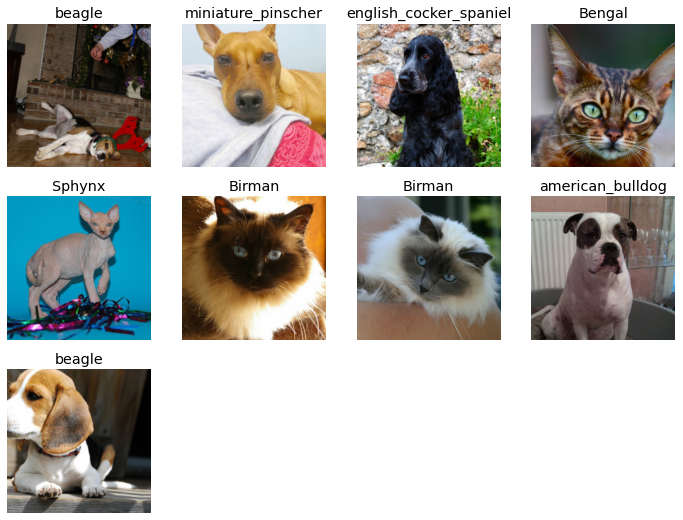

In [8]:
#checking datablock 
dls.show_batch(nrows=3, ncols=4)

In [59]:
#training simple model first 
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,1.556093,1.093799,0.332215,00:56


epoch,train_loss,valid_loss,error_rate,time
0,0.503244,1.006780,0.292617,01:12
1,0.319430,0.906977,0.275839,01:11


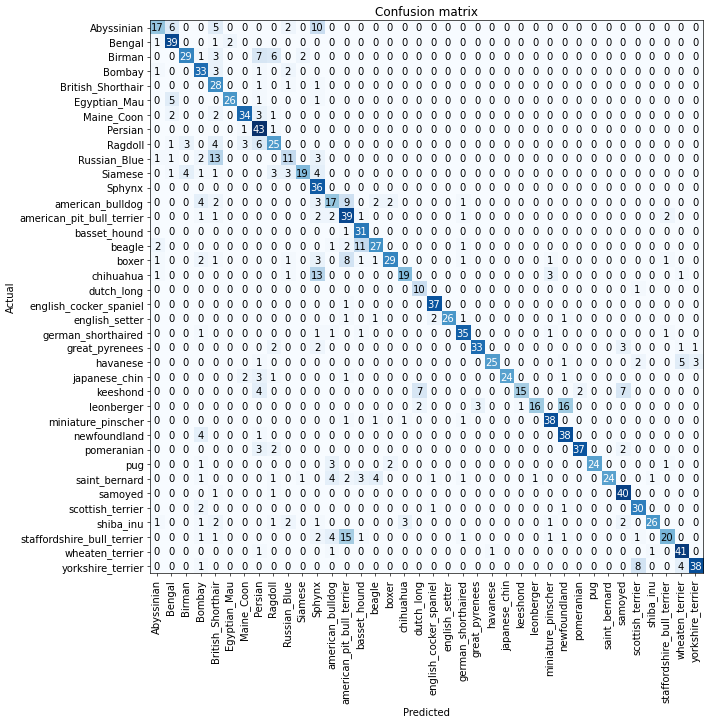

In [60]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [61]:
interp.most_confused(min_val=5)

[('leonberger', 'newfoundland', 16),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 15),
 ('Russian_Blue', 'British_Shorthair', 13),
 ('chihuahua', 'Sphynx', 13),
 ('beagle', 'basset_hound', 11),
 ('Abyssinian', 'Sphynx', 10),
 ('american_bulldog', 'american_pit_bull_terrier', 9),
 ('boxer', 'american_pit_bull_terrier', 8),
 ('yorkshire_terrier', 'scottish_terrier', 8),
 ('Birman', 'Persian', 7),
 ('keeshond', 'dutch_long', 7),
 ('keeshond', 'samoyed', 7),
 ('Abyssinian', 'Bengal', 6),
 ('Birman', 'Ragdoll', 6),
 ('Ragdoll', 'Persian', 6),
 ('Abyssinian', 'British_Shorthair', 5),
 ('Egyptian_Mau', 'Bengal', 5),
 ('havanese', 'wheaten_terrier', 5)]

# Trying different architectures to see which ones are working good. 

In [62]:
learn1 = cnn_learner(dls, resnet18, metrics=accuracy)
learn1.fine_tune(3, freeze_epochs = 3)

epoch,train_loss,valid_loss,accuracy,time
0,2.644211,1.955976,0.435570,00:38
1,1.034355,1.463004,0.555034,00:38
2,0.633948,1.406236,0.583221,00:38


epoch,train_loss,valid_loss,accuracy,time
0,0.409840,1.297279,0.616107,00:46
1,0.335937,1.139445,0.658389,00:46
2,0.212254,1.097123,0.675839,00:46


In [63]:
learn2 = cnn_learner(dls, resnet34, metrics=accuracy)
learn2.fine_tune(3, freeze_epochs = 3)

epoch,train_loss,valid_loss,accuracy,time
0,2.579121,1.416876,0.573825,00:56
1,0.945781,1.068835,0.681208,00:56
2,0.560748,1.009892,0.693289,00:56


epoch,train_loss,valid_loss,accuracy,time
0,0.391371,0.945842,0.720134,01:10
1,0.321569,0.815380,0.768456,01:10
2,0.196171,0.673218,0.792617,01:11


In [6]:
learn3 = cnn_learner(dls, resnet50, metrics=accuracy)
learn3.fine_tune(3, freeze_epochs = 3)

epoch,train_loss,valid_loss,accuracy,time
0,0.868838,1.402061,0.617450,01:37
1,0.547918,1.278744,0.646980,01:37
2,0.488928,1.240211,0.685906,01:37


epoch,train_loss,valid_loss,accuracy,time
0,0.452107,1.217612,0.676510,02:01
1,0.355287,1.116363,0.712081,02:01
2,0.175435,0.776678,0.769799,02:02


In [7]:
learn4 = cnn_learner(dls, squeezenet1_1, metrics=accuracy)
learn4.fine_tune(3, freeze_epochs = 3)

epoch,train_loss,valid_loss,accuracy,time
0,2.773263,3.221841,0.141611,00:22
1,1.288478,2.628137,0.292617,00:23
2,0.993939,2.716413,0.263758,00:23


epoch,train_loss,valid_loss,accuracy,time
0,0.737471,2.106290,0.412752,00:32
1,0.636711,2.136889,0.385235,00:31
2,0.484330,2.138631,0.374497,00:32


In [4]:
learn5 = cnn_learner(dls, densenet169, metrics=accuracy)
learn5.fine_tune(3, freeze_epochs = 3)

epoch,train_loss,valid_loss,accuracy,time
0,0.897346,0.610638,0.805369,02:28
1,0.573465,0.559104,0.826846,02:28
2,0.472924,0.448016,0.859060,02:28


epoch,train_loss,valid_loss,accuracy,time
0,0.434022,0.479373,0.860403,03:04
1,0.329748,0.393087,0.878523,03:04
2,0.168320,0.310799,0.902013,03:04


In [5]:
learn6 = cnn_learner(dls, alexnet, metrics=accuracy)
learn6.fine_tune(3, freeze_epochs = 3)

epoch,train_loss,valid_loss,accuracy,time
0,2.808901,3.249965,0.149664,00:23
1,1.491769,3.404073,0.171812,00:22
2,1.292792,2.816676,0.218792,00:22


epoch,train_loss,valid_loss,accuracy,time
0,1.011806,2.905360,0.214094,00:26
1,0.897462,2.414209,0.279866,00:26
2,0.722408,2.349756,0.304027,00:27


In [9]:
#Training a densenet better
learn_densenet = cnn_learner(dls, densenet169, metrics=accuracy)
learn_densenet.fine_tune(35, freeze_epochs = 10)

epoch,train_loss,valid_loss,accuracy,time
0,1.109095,0.687261,0.783893,02:29
1,0.558323,0.511136,0.842282,02:29
2,0.493189,0.465432,0.842953,02:29
3,0.439556,0.551628,0.833557,02:29
4,0.385778,0.474571,0.863758,02:29


epoch,train_loss,valid_loss,accuracy,time
0,0.258212,0.356894,0.891275,03:04
1,0.204764,0.365465,0.887248,03:04
2,0.143378,0.379802,0.887248,03:05
3,0.160946,0.334884,0.899329,03:05
4,0.154577,0.397108,0.879866,03:05
5,0.160963,0.383242,0.884564,03:04
6,0.175731,0.473796,0.871812,03:04
7,0.160395,0.472281,0.875168,03:03
8,0.175109,0.444314,0.874497,03:04
9,0.185273,0.573538,0.848993,03:03


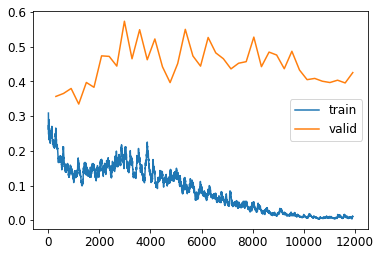

In [13]:
learn_densenet.recorder.plot_loss()

In [21]:
learn_inf = load_learner(path/'export.pkl')
voc = learn_inf.dls.vocab
voc

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'dutch_long', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']

In [22]:
len(voc)

38